In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def random_decimal_target(min_len=2, max_len=10, seed=None):
    if seed is not None:
        random.seed(seed)
    size = random.randint(min_len, max_len)
    return ''.join(random.choice('0123456789') for _ in range(size))


In [3]:
def decimal_fitness(guess, target):
    common = min(len(guess), len(target))
    score = sum(guess[i] == target[i] for i in range(common))
    penalty = abs(len(guess) - len(target))
    return (score - penalty) / max(len(guess), len(target))


In [4]:
def decimal_mutate(pattern):
    pattern = list(pattern)
    mutation_type = random.choice(["change", "add", "remove"])

    if mutation_type == "change" and pattern:
        idx = random.randrange(len(pattern))
        pattern[idx] = random.choice('0123456789')

    elif mutation_type == "add":
        idx = random.randint(0, len(pattern))
        pattern.insert(idx, random.choice('0123456789'))

    elif mutation_type == "remove" and len(pattern) > 2:
        idx = random.randrange(len(pattern))
        pattern.pop(idx)

    return ''.join(pattern)

In [5]:
def decimal_crossover(p1, p2):
    min_len = min(len(p1), len(p2))
    if min_len < 2:
        return p1
    point = random.randint(1, min_len - 1)
    child = p1[:point] + p2[point:]

    # small probability to mutate child for diversity
    if random.random() < 0.3:
        child = decimal_mutate(child)

    return child


In [6]:
def adaptive_population_search_decimal(target, pop_size=80, select_ratio=0.3, max_gen=150):
    pop = [random_decimal_target(len(target), len(target)) for _ in range(pop_size)]
    best_history = []
    for gen in range(max_gen):
        fits = [decimal_fitness(p, target) for p in pop]
        best_fit = max(fits)
        best_history.append(best_fit)
        if best_fit >= 1.0:
            break
        sorted_pop = [p for _, p in sorted(zip(fits, pop), reverse=True)]
        survivors = sorted_pop[:int(pop_size*select_ratio)]
        offspring = []
        for _ in range(pop_size - len(survivors)):
            p1, p2 = random.sample(survivors, 2)
            child = decimal_crossover(p1, p2)
            offspring.append(child)
        pop = survivors + offspring
        if len(best_history) > 8 and len(set(best_history[-5:])) == 1:
            break
    return gen+1, max(best_history)

##### Experiment

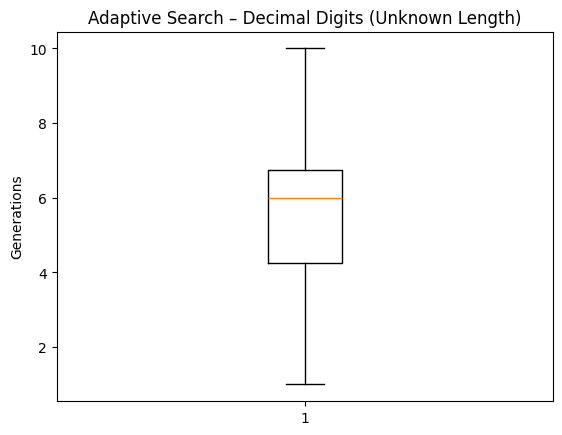

Mean generations: 5.5
Mean final fitness: 1.00


In [7]:
n_trials = 10
gens_list = []
fitness_list = []

for seed in range(n_trials):
    random.seed(seed)
    target = random_decimal_target()
    gens, best_fit = adaptive_population_search_decimal(target)
    gens_list.append(gens)
    fitness_list.append(best_fit)

plt.boxplot(gens_list)
plt.title("Adaptive Search – Decimal Digits (Unknown Length)")
plt.ylabel("Generations")
plt.show()

print(f"Mean generations: {np.mean(gens_list):.1f}")
print(f"Mean final fitness: {np.mean(fitness_list):.2f}")
